<a href="https://colab.research.google.com/github/mansi05-t/Olympics/blob/master/Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summer & Winter Olympics**

![picture](https://drive.google.com/uc?id=1E3B9xLa5wnWPSdMD9odEdWtNZ5U2F69X)





# Problem Statement

Analysing the summer and winter olympics datasets to get informative insights through visualisations.

# Introduction
More than 35,000 medals have been awarded at the Olympics since 1896. The first two Olympiads awarded silver medals and an olive wreath for the winner, and the IOC retrospectively awarded gold, silver, and bronze to athletes based on their rankings. This dataset includes a row for every Olympic athlete that has won a medal since the first games.

**Importing the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly

In [ ]:
winter=pd.read_csv('https://github.com/mansi05-t/Data-Science/raw/master/Olympic/winter.csv')
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [ ]:
summer = pd.read_csv('https://raw.githubusercontent.com/mansi05-t/Data-Science/master/Olympic/summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [ ]:
dic = pd.read_csv('https://github.com/mansi05-t/Data-Science/raw/master/Olympic/dictionary.csv')
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


# Analyzing the Summer Dataset:



**Changing the 'Country' column name and merging the dictionary dataset fo the codes**

In [ ]:
summer.rename(columns={'Country':'Code'},inplace = True)

In [ ]:
summer=pd.merge(summer,dic,on='Code')

In [ ]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346


In [ ]:
summer.shape

(25742, 12)

In [ ]:
summer.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,25742.0,1.969715e+03,3.559911e+01,1896.000000,1.936000e+03,1.984000e+03,2.000000e+03,2.012000e+03
Population,25696.0,1.486127e+08,2.671679e+08,65235.000000,1.138956e+07,6.080208e+07,1.440968e+08,1.371220e+09
GDP per Capita,25142.0,3.681983e+04,1.954502e+04,277.068309,1.711850e+04,4.131331e+04,5.611572e+04,1.014500e+05


Our dataset goes from 1896 to 2012.

**To include various dtypes we use the 'include' parameter**

In [ ]:
summer.describe(include='O')

,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
count,25742,25742,25742,25742,25742,25742,25742,25742,25742
unique,22,43,67,19059,129,2,666,3,129
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Hockey,Bronze,United States
freq,3440,3558,3034,22,4585,19036,1297,8637,4585


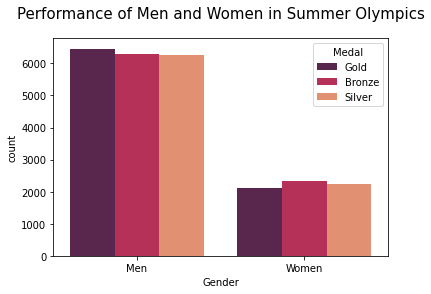

In [ ]:
sns.countplot(x ='Gender', hue ='Medal', data = summer, palette = 'rocket')
plt.title("Performance of Men and Women in Summer Olympics",pad = 20,fontsize = '15')
plt.show()

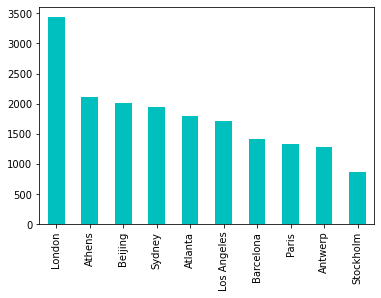

In [ ]:
summer["City"].value_counts().head(10).plot(kind = 'bar', color = 'c')
plt.show()

In [ ]:
Top_countries = summer["Country"].value_counts().reset_index(name ="Medal").head(10)
Top_countries

,index,Medal
0,United States,4585
1,United Kingdom,1720
2,France,1396
3,Germany,1305
4,Italy,1296
5,Australia,1189
6,Hungary,1079
7,Sweden,1044
8,Netherlands,851
9,China,807


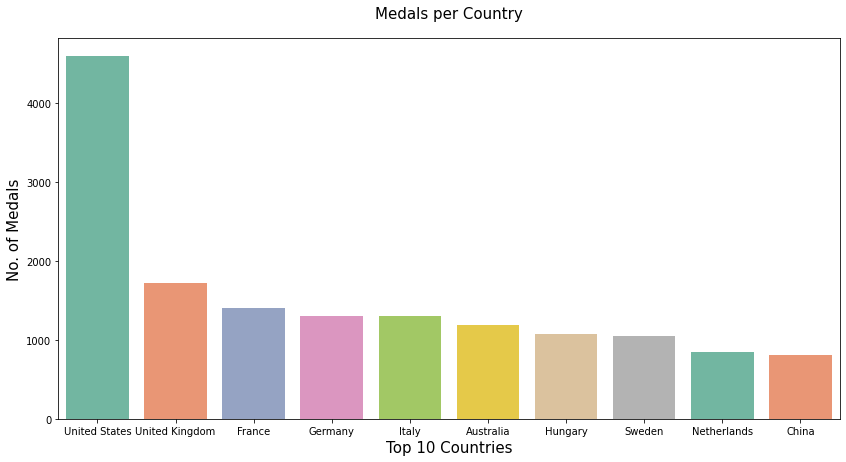

In [ ]:
fig, ax = plt.subplots(figsize= (14,7))
sns.barplot(x = "index",y = "Medal", data = Top_countries,palette='Set2')
plt.title("Medals per Country", fontsize = '15', pad = 20)
plt.xlabel("Top 10 Countries",fontsize = '15')
plt.ylabel("No. of Medals",fontsize = '15')
plt.show()

**Plotting a Chloropeth Map to visualize which country won the most number of medals**

In [ ]:
medals_map=summer.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map=medals_map[medals_map['Medal']>0]

fig = px.choropleth(medals_map, locations="Code",
                    color="Medal",
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

As we can see, USA won the most number of medals in the Summer Olympics from 1896 to 2012.

In [ ]:
a = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
a

'PHELPS, Michael'

In [ ]:
b = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]
b

22

**The most successful Male Athlete:**

In [ ]:
print('The Highest Decorated Summer Male Athlete is',a,'with',b,'medals of',summer[summer['Gender']=='Men']['Country'].value_counts()[:1].index[0])

The Highest Decorated Summer Male Athlete is PHELPS, Michael with 22 medals of United States


**The most successful Female Athlete:**

In [ ]:
print('The Highest Decorated Summer Female Athlete is',
       summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],
      'with',summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],'medals of',
       summer[summer['Gender']=='Women']['Country'].value_counts()[:1].index[0])

The Highest Decorated Summer Female Athlete is COUGHLIN, Natalie with 12 medals of United States


# Who won the most medals?

In [ ]:
medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by = 'Sport', ascending = False)
medals = medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
15459,"PHELPS, Michael",Gold,18
13983,"NEMOV, Alexei",Bronze,6
839,"BABASHOFF, Shirley Farber",Silver,6


# **Visualizing the medal distribution of top 10 countries:**

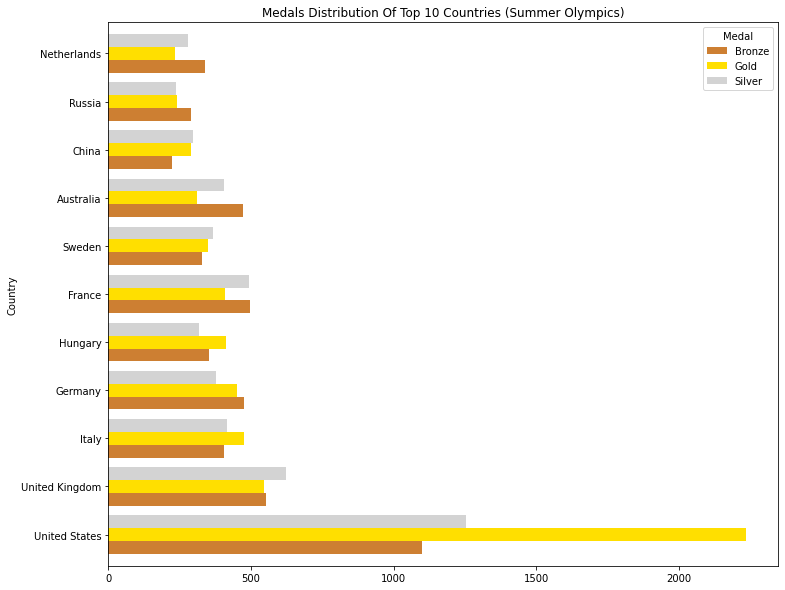

In [ ]:
medals_country = summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by = 'Gender' , ascending = 'False')
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

# **Best Male and Female Athletes:**

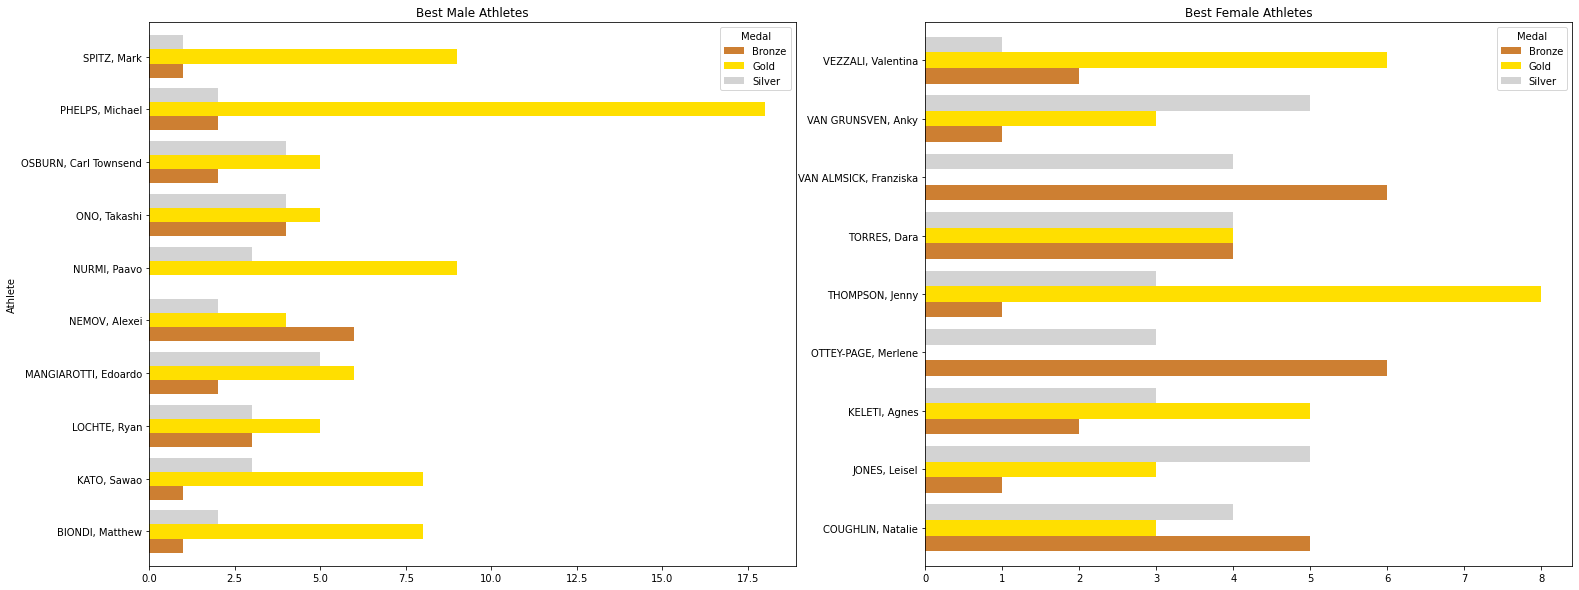

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(25.5,10))
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

# **Analyzing the Winter dataset:**

In [ ]:
winter.rename(columns={'Country':'Code'}, inplace = True)

In [ ]:
winter = pd.merge(winter,dic,on='Code',how = 'outer')

In [ ]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1924.0,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
1,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
2,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
3,1924.0,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
4,1924.0,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102


In [ ]:
winter.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5770.0,1.986350e+03,2.426367e+01,1924.000000,1.972000e+03,1.994000e+03,2.006000e+03,2.014000e+03
Population,4985.0,9.536055e+07,1.953490e+08,10222.000000,8.286976e+06,3.585177e+07,8.141314e+07,1.371220e+09
GDP per Capita,4956.0,4.473874e+04,1.927150e+04,277.068309,4.131331e+04,4.324853e+04,5.611572e+04,1.014500e+05


In [ ]:
winter.describe(include ='O')

,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
count,5770,5770,5770,5770,5934,5770,5770,5770,4990
unique,19,7,15,3761,209,2,83,3,201
top,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver,United States
freq,612,1781,1536,13,653,3944,1536,1930,653


**Plotting a Chloropeth Map to visualize which country won the most number of medals**


In [ ]:
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map = medals_map[medals_map['Medal']>0]

fig = px.choropleth(medals_map,locations="Code",
                      color = "Medal",
                      hover_name = "Country",
                      color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

**The most successful Male Winter Athlete:**

In [ ]:
print("The highest decorated winter male athlete is", winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],
"with", winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],"Medals from", winter[winter['Gender']=='Men']['Country'].value_counts()[:1].index[0])

The highest decorated winter male athlete is BJOERNDALEN, Ole Einar with 13 Medals from United States


**The most successful Female Winter Athlete:**

In [ ]:
print('The Highest Decorated Winter Female Athlete is: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],
      'with: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals from', winter[winter['Gender']=='Women']['Country'].value_counts()[:1].index[0])

The Highest Decorated Winter Female Athlete is:  SMETANINA, Raisa with:  10  medals from United States


**Medal winners**

In [ ]:
medals=winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
724,"DAEHLIE, Björn",Gold,8
2029,"KIRVESNIEMI, Harri",Bronze,6
932,"EHRIG, Andrea",Silver,5


# **Medal distrubution of top 10 countries:**

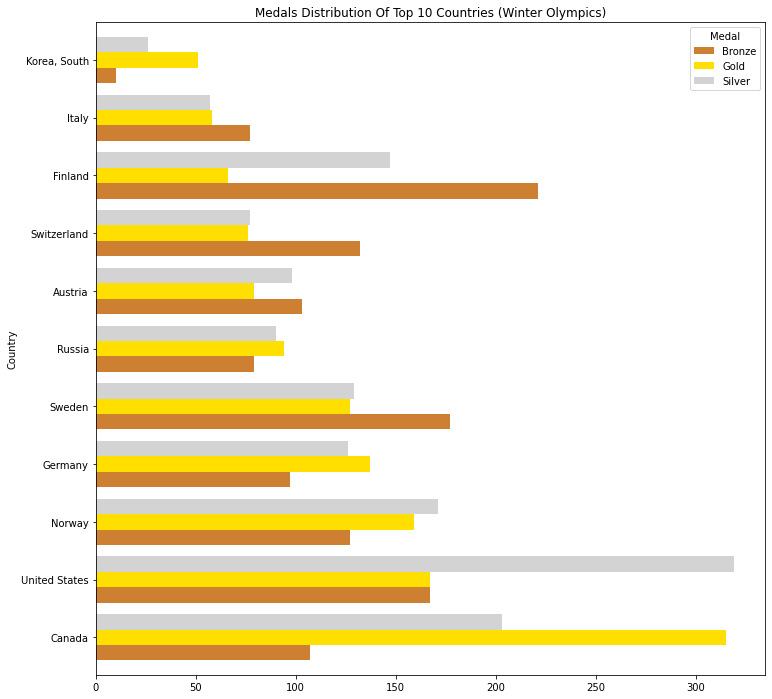

In [ ]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

# **Best Male and Female Athletes:**

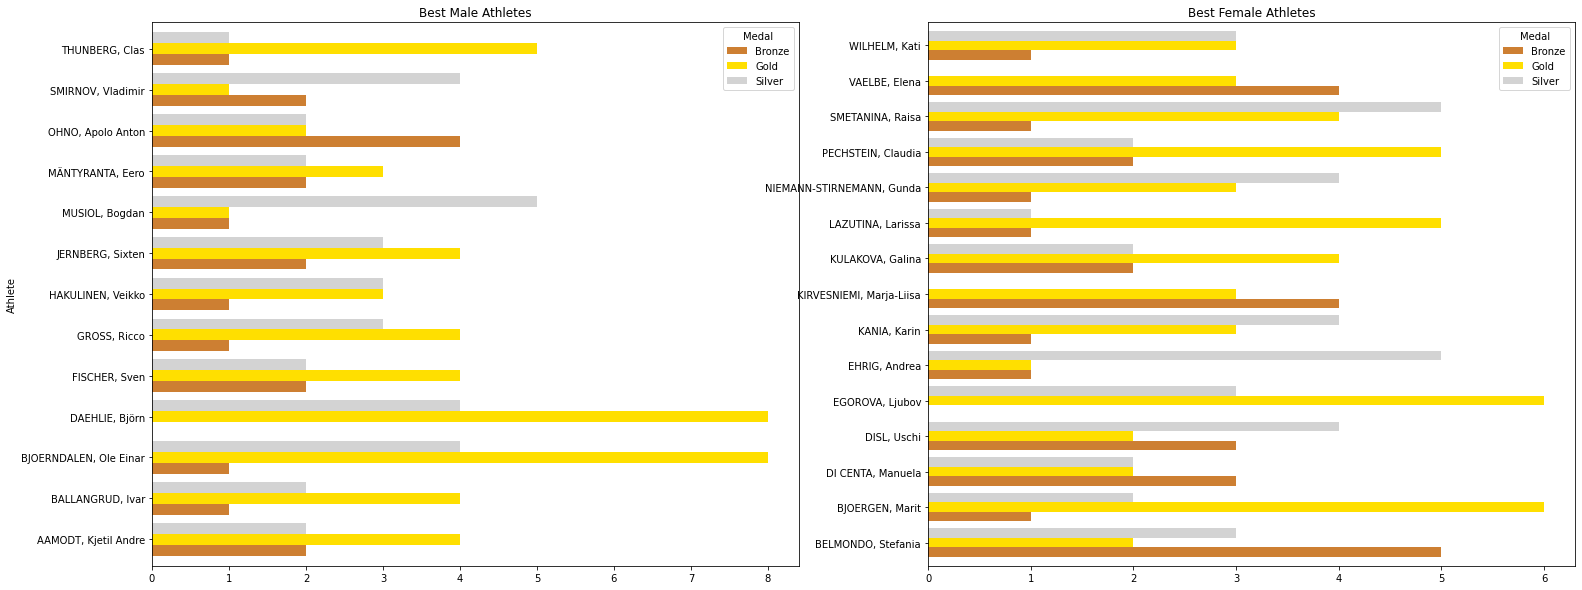

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(25.5,10))
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:25])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()